In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def minmod(a,b):
    if a*b <= 0:
        return 0
    elif (a > 0) and (b > 0):
        return min(a, b)
    elif (a < 0) and (b < 0):
        return max(a, b)
    
def maxmod(a,b):
    if a*b <= 0:
        return 0
    elif (a > 0) and (b > 0):
        return max(a, b)
    elif (a < 0) and (b < 0):
        return min(a, b)
    
def f(x,y,z):
    #Схема Лакса-Вендроффа
    #return z-y
    #Схема Бима-Уорминга
    #return y-x
    #Схема Фромма
    #return 0.5*(z-x)
    # Ограничитель minmod
    #return minmod(z-y, y-x)
    # Ограничитель superbee
    #return maxmod(minmod(2*(z-y), y-x), minmod(z-y, 2*(y-x)))
    #Ограничитель ван Альбада
    #return (z-x)*max(0,(z-y)*(y-x))/((z-y)**2 + (y-x)**2 + 10**(-14))
    #Ограничитель ван Лира
    return ((y-x)*abs(z-y) + (z-y)*abs(y-x))/(abs(z-y) + abs(y-x) + 10**(-14))

def F(a,b,c,d):
    return f(a, b, c)-f(d, a, b)

def fillValues(x, size, Step):
    x.append(0)
    for i in range(size - 1):
        x.append(x[i] + Step)

def U0(x):
# Треугольник
#    if (x <= 0.5) and (x >= 0.4):
#        return 10*x-4 
#    elif (x<=0.6) and (x>=0.5):
#        return -10*x + 6
#    else:
#        return 0 
    
#Ступенька
    if (x <= 0.6) and (x >= 0.4):
        return 1
    else:
        return 0

#Полуэллипс
#    if (x <= 0.6) and (x >= 0.4):
#        return np.sqrt(1 - 100*((x-0.5)**2))
#    else:
#        return 0
#    return np.sin(pi*x/L)
    return np.sin(x)

c = 1.
L = 1.
T = 4.
gridWidth = 200
gridHeight = 1000
xStep = L/gridWidth
tau = T/gridHeight 
Q = c*tau/xStep

if (Q < 1):
    print("ЕСТЬ СХОДИМОСТЬ")
else:
    print("НЕТ СХОДИМОСТИ")
Q

ЕСТЬ СХОДИМОСТЬ


0.8

In [7]:
x =[]
t = []

fillValues(x, gridWidth, xStep)
fillValues(t, gridHeight, tau)

In [31]:
U = np.zeros((gridWidth,gridHeight))

for i in range(gridWidth):
    U[i,0] = U0(x[i])

for j in range(gridHeight):
    U[0,j] = 0

In [32]:
for j in range(gridHeight - 1):
    for i in range(2, gridWidth - 1):
        U[i][j+1] = (1 - Q)*U[i][j] + Q*U[i - 1][j] + Q*(Q-1)/2*F(U[i-1][j], U[i][j], U[i+1][j], U[i-2][j])
    U[gridWidth-1][j+1] = (1 - Q)*U[gridWidth-1][j] + Q*U[gridWidth - 2][j]
    U[0][j+1] = U0(x[0] - c*t[j+1])
    U[1][j+1] = U0(x[1] - c*t[j+1])

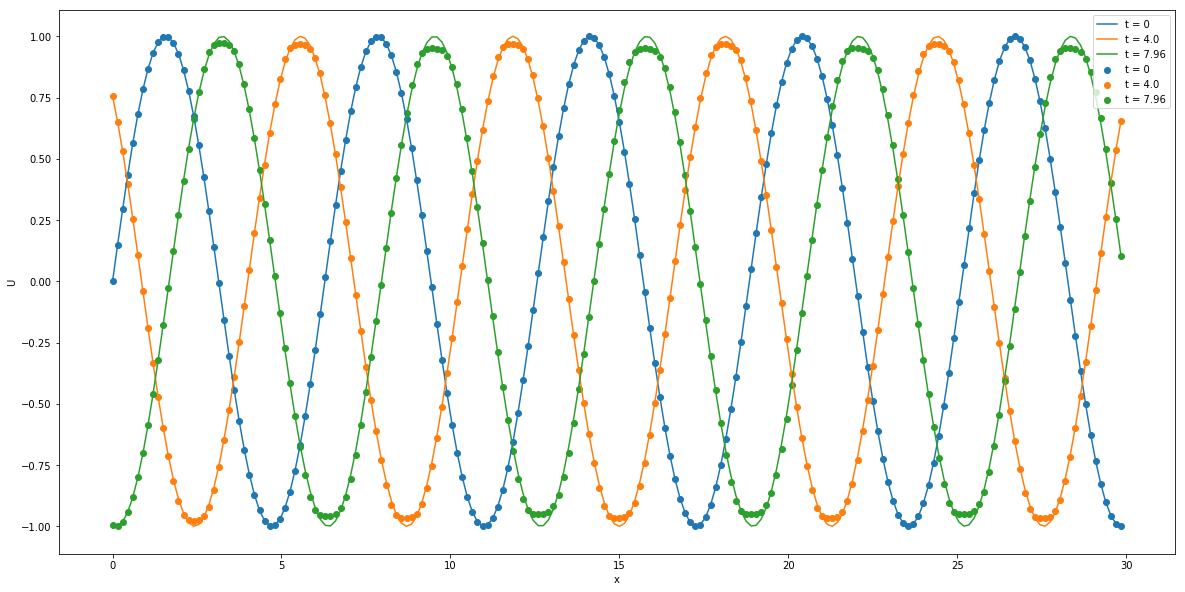

In [33]:
U_real = np.zeros((gridWidth, gridHeight))

for j in range(gridHeight):
    for i in range(gridWidth):
        U_real[i,j] = U0(x[i] - c*t[j])

plt.figure(figsize=(20, 10))
for i in (0, 100, 199):
    plt.scatter(x, U[:,i], label='t = %s'%t[i])
    plt.plot(x, U_real[:,i], label='t = %s'%t[i])
    plt.legend(loc = 'best')
    plt.xlabel('x')
    plt.ylabel('U')
plt.show()

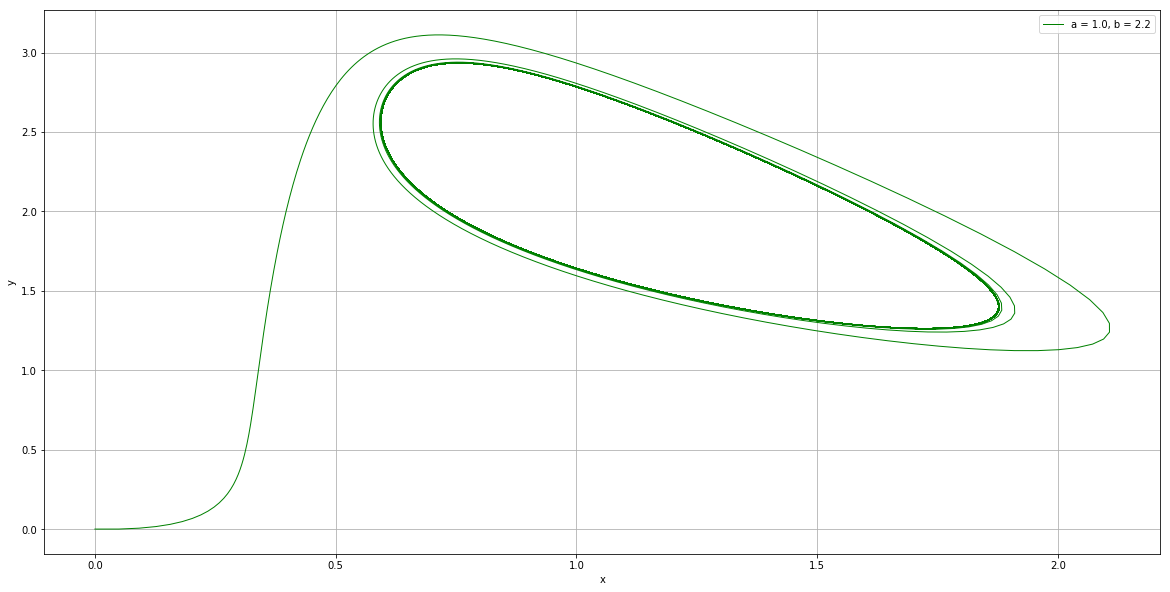

0.05

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 20000 

x = np.zeros(n+1)
y = np.zeros(n+1)
t = np.zeros(n+1)

#x[0] = 0
#y[0] = 0

tau = 1000./n
a = 1.
b = 2.2

def f1(x,y):
    return a-(b+1)*x+(x**2)*y

def f2(x,y):
    return b*x-(x**2)*y

for i in range(n):
    m1 = tau*f1(x[i], y[i])
    n1 = tau*f2(x[i], y[i])
    m2 = tau*f1(x[i] + 0.5*tau*m1, y[i] + 0.5*tau*n1)
    n2 = tau*f2(x[i] + 0.5*tau*m1, y[i] + 0.5*tau*n1)
    m3 = tau*f1(x[i] + 0.5*tau*m2, y[i] + 0.5*tau*n2)
    n3 = tau*f2(x[i] + 0.5*tau*m2, y[i] + 0.5*tau*n2)
    m4 = tau*f1(x[i] + tau*m3, y[i] + tau*n3)
    n4 = tau*f2(x[i] + tau*m3, y[i] + tau*n3)
    t[i+1] = t[i] + tau
    x[i+1] = x[i] + 1./6*(m1 + 2*m2 + 2*m3 + m4)
    y[i+1] = y[i] + 1./6*(n1 + 2*n2 + 2*n3 + n4)

plt.figure(figsize = (20,10))
plt.plot(x, y, linewidth = 1, color = 'green', label='a = %s, b = %s'%(a, b))
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
tau